In [1]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import time

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def gaussian_distribution(M_injection, sigma):
    M_recovered = np.random.normal(M_injection, sigma)
    M_recovered = np.array([M_recovered])
    return M_recovered
#this function would take in a random mass generated by var s, that will get put into the gaussian dist function
#with a predefined sigma 0.001
#a new variable mass_injections is run through a loop to iterate for every mass_inj (randomly produced), an array
#of the same length will iterate. so bascially for every mass produced, there is a recovered mass by the
#np.random.normal into M_recovered with the same sigma and that is 1 injection. we want 10,000 of these.

In [3]:
def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                        random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [ ]:
# M_inj = 10 + (20 - 10)*np.random.random(100000)
# M_rec = M_inj + 5
# M_inj = M_inj.reshape(-1, 1)
# M_rec = M_rec.reshape(-1, 1)
# x_test, pred, predictor = mass_predictor(M_inj, M_rec)

In [ ]:
# masses = np.array([15, 17, 19])
# X = predictor(masses)
# #print(predictor(masses))

In [ ]:
#x_train

In [ ]:
#x_test

In [ ]:
#pred

In [ ]:
#predictor

In [ ]:
#plt.scatter(x_test, pred, s=2)

In [4]:
def one_mass_prediction(amt_inj, sig):
    st1 = time.time()
    M_inj1 = 10 + (20 - 10)*np.random.random(amt_inj)
    #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
    #sigma = 0.001
    sigma = sig
    M_recovered_values = gaussian_distribution(M_inj1, sigma)
    M_inj1 = M_inj1.reshape(-1, 1)
    M_recovered_values = M_recovered_values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    print(y_pred)
    print(X_test)
    et1 = time.time()
    dt = et1 - st1
    print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
    df2 = df1.corr()
    plt.scatter(X_test, y_pred, s=2)
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    mean_y_pred1 = np.mean(y_pred)
    print(mean_y_pred1, 'average true mass prediction')
    print(np.mean(M_inj1), 'avg mass injected')
    error = (((np.mean(y_pred) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et2 = time.time()
    dt1 = et2 - st1
    print(dt1,'total time to run')
    return X_test, y_pred, df2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_34898/1315229924.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


[18.45279043 19.20653743 14.84638751 ... 10.3525256  16.68535466
 18.23380258]
[[18.4510565 ]
 [19.20660495]
 [14.84532176]
 ...
 [10.35343612]
 [16.68600855]
 [18.23424104]]
0.6330890655517578 time to train model


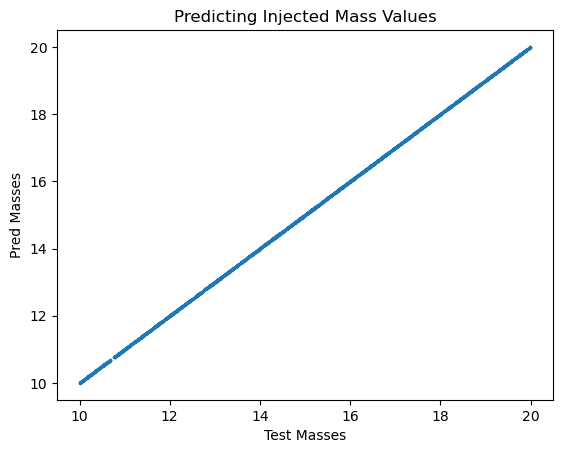

15.004054332468936 average true mass prediction
15.00468085403883 avg mass injected
99.9958244925301 % accuracy between the predicted injected mass and actual random injected mass based on recovered
0.744520902633667 total time to run


(array([[18.4510565 ],
        [19.20660495],
        [14.84532176],
        ...,
        [10.35343612],
        [16.68600855],
        [18.23424104]]),
 array([18.45279043, 19.20653743, 14.84638751, ..., 10.3525256 ,
        16.68535466, 18.23380258]),
         X_test  y_pred
 X_test     1.0     1.0
 y_pred     1.0     1.0)

In [5]:
one_mass_prediction(10000, 0.001)

In [12]:
def one_mass_prediction_offset(amt_inj, c):
    st1 = time.time()
    M_inj = 10 + (20 - 10)*np.random.random(amt_inj)
    #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
    #sigma = 0.001
    M_recovered_values = M_inj + c
    M_inj = M_inj.reshape(-1, 1)
    M_recovered_values = M_recovered_values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_recovered_values, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    print(y_pred, 'y_pred')
    print(X_test, 'X_test')
    et1 = time.time()
    dt = et1 - st1
    print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
    df2 = df1.corr()
    plt.scatter(X_test, y_pred, s=2)
    plt.plot([10, 20], [10, 20], "r--")
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    mean_y_pred = np.mean(y_pred)
    print(mean_y_pred, 'average true mass prediction')
    print(np.mean(M_inj), 'avg mass injected')
    error = (((np.mean(y_pred) - np.mean(M_inj)) / np.mean(M_inj)) * 100) + 100
    print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
    et2 = time.time()
    dt1 = et2 - st1
    print(dt1,'total time to run')
    return X_test, y_pred, df2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_34898/345243384.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_test, y_test)


[24.4079157  17.78066064 18.07532127 ... 24.58481214 17.53874893
 21.06314739] y_pred
[[19.40786993]
 [12.78076905]
 [13.07530783]
 ...
 [19.58480449]
 [12.53872995]
 [16.06312772]] X_test
1.8039281368255615 time to train model


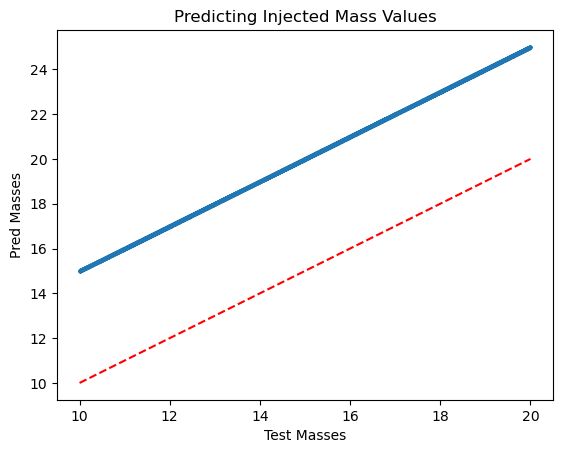

19.985672433716008 average true mass prediction
15.005876280584754 avg mass injected
133.18564047855259 % accuracy between the predicted injected mass and actual random injected mass based on recovered
1.896923303604126 total time to run


(array([[19.40786993],
        [12.78076905],
        [13.07530783],
        ...,
        [19.58480449],
        [12.53872995],
        [16.06312772]]),
 array([24.4079157 , 17.78066064, 18.07532127, ..., 24.58481214,
        17.53874893, 21.06314739]),
         X_test  y_pred
 X_test     1.0     1.0
 y_pred     1.0     1.0)

In [13]:
one_mass_prediction_offset(100000, 5)